# [실습] 따릉이 데이터를 활용한 데이터 분석

### 참고
- **참고영상** https://www.youtube.com/watch?v=WreGAJxukpA 

### 목표
- **날짜의 1시간 전의 기상상황을 가지고 1시간 후의 따릉이 대여수를 예측해본다.** 

### 머신러닝 모델(분류)
- **랜덤 포레스트 모형** : sklearn.ensemble.RandomForestRegressor()

### 평가지표
- RMSE(Root Mean Squared Error,평균 제곱근 오차)

In [1]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/875/1*XRXgMqrr5rq-V1rW7SkrtA.png'
     , width=400, height=300)

---------------------

## 1.데이터 준비하기

- 다운로드 :  https://dacon.io/competitions/open/235576/data
- train.csv, test.csv

In [14]:
# 데이터 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DIR = 'data/따릉이/'
train = pd.read_csv(DIR+'train.csv')      # 모델 학습 파일(feature + target)
test  = pd.read_csv(DIR+'test.csv')       # 모델 테스트 파일(feature)
submission = pd.read_csv(DIR+'test.csv')  # 테스트(feature) + 모델예측값(target) 저장 파일 

train.head()
# test.head()
# submission.head()

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   3    20                  16.3                     1.0                 1.5   
1   6    13                  20.1                     0.0                 1.4   
2   7     6                  13.9                     0.0                 0.7   
3   8    23                   8.1                     0.0                 2.7   
4   9    18                  29.5                     0.0                 4.8   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               89.0                576.0           0.027           76.0   
1               48.0                916.0           0.042           73.0   
2               79.0               1382.0           0.033           32.0   
3               54.0                946.0           0.040           75.0   
4                7.0               2000.0           0.057           27.0   

   hour_bef_pm2.5  count  
0            33.0   49.0  
1            40.0  159.0  
2            19.0   26.0  
3            64.0   57.0  
4            11.0  431.0

## 2. 탐색적 데이터 분석을 위한 이해: Exploratory Data Analysis (EDA)


In [15]:
import pandas as pd #판다스 패키지 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #랜덤 포레스트 불러오기

### pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [16]:
train.head()

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   3    20                  16.3                     1.0                 1.5   
1   6    13                  20.1                     0.0                 1.4   
2   7     6                  13.9                     0.0                 0.7   
3   8    23                   8.1                     0.0                 2.7   
4   9    18                  29.5                     0.0                 4.8   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               89.0                576.0           0.027           76.0   
1               48.0                916.0           0.042           73.0   
2               79.0               1382.0           0.033           32.0   
3               54.0                946.0           0.040           75.0   
4                7.0               2000.0           0.057           27.0   

   hour_bef_pm2.5  count  
0            33.0   49.0  
1            40.0  159.0  
2            19.0   26.0  
3            64.0   57.0  
4            11.0  431.0

+ id : 날짜와 시간별 id
+ hour_bef_temperature : 1시간 전 기온
+ hour_bef_precipitation : 1시간 전 비 정보, 비가 오지 않았으면 0, 비가 오면 1
+ hour_bef_windspeed : 1시간 전 풍속(평균)
+ hour_bef_humidity : 1시간 전 습도
+ hour_bef_visibility : 1시간 전 시정(視程), 시계(視界)(특정 기상 상태에 따른 가시성을 의미)
+ hour_bef_ozone : 1시간 전 오존
+ hour_bef_pm10 : 1시간 전 미세먼지(머리카락 굵기의 1/5에서 1/7 크기의 미세먼지)
+ hour_bef_pm2.5 : 1시간 전 미세먼지(머리카락 굵기의 1/20에서 1/30 크기의 미세먼지)
+ count : 시간에 따른 따릉이 대여 수 

#### [Tip!!!] 테스트 데이터를 이용하여 학습모델의 정확도를 확인하려면 test데이터를 데이콘 사이트에 올리면 결과값(유사도) 제공해 준다.

In [17]:
test.head()

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   0     7                  20.7                     0.0                 1.3   
1   1    17                  30.0                     0.0                 5.4   
2   2    13                  19.0                     1.0                 2.1   
3   4     6                  22.5                     0.0                 2.5   
4   5    22                  14.6                     1.0                 3.4   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               62.0                954.0           0.041           44.0   
1               33.0               1590.0           0.061           49.0   
2               95.0                193.0           0.020           36.0   
3               60.0               1185.0           0.027           52.0   
4               93.0                218.0           0.041           18.0   

   hour_bef_pm2.5  
0            27.0  
1            36.0  
2            28.0  
3            38.0  
4            15.0

In [18]:
submission.head()

id  hour  hour_bef_temperature  hour_bef_precipitation  hour_bef_windspeed  \
0   0     7                  20.7                     0.0                 1.3   
1   1    17                  30.0                     0.0                 5.4   
2   2    13                  19.0                     1.0                 2.1   
3   4     6                  22.5                     0.0                 2.5   
4   5    22                  14.6                     1.0                 3.4   

   hour_bef_humidity  hour_bef_visibility  hour_bef_ozone  hour_bef_pm10  \
0               62.0                954.0           0.041           44.0   
1               33.0               1590.0           0.061           49.0   
2               95.0                193.0           0.020           36.0   
3               60.0               1185.0           0.027           52.0   
4               93.0                218.0           0.041           18.0   

   hour_bef_pm2.5  
0            27.0  
1            36.0  
2            28.0  
3            38.0  
4            15.0

### pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [19]:
train.tail()

id  hour  hour_bef_temperature  hour_bef_precipitation  \
1454  2174     4                  16.8                     0.0   
1455  2175     3                  10.8                     0.0   
1456  2176     5                  18.3                     0.0   
1457  2178    21                  20.7                     0.0   
1458  2179    17                  21.1                     0.0   

      hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
1454                 1.6               53.0               2000.0   
1455                 3.8               45.0               2000.0   
1456                 1.9               54.0               2000.0   
1457                 3.7               37.0               1395.0   
1458                 3.1               47.0               1973.0   

      hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  count  
1454           0.031           37.0            27.0   21.0  
1455           0.039           34.0            19.0   20.0  
1456           0.009           30.0            21.0   22.0  
1457           0.082           71.0            36.0  216.0  
1458           0.046           38.0            17.0  170.0

### pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [20]:
print(f'train.shape : {train.shape}')
print(f'test.shape  : {test.shape}')
print(f'submission.shape : {submission.shape}')

train.shape : (1459, 11)
test.shape  : (715, 10)
submission.shape : (715, 10)


### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      715 non-null    int64  
 1   hour                    715 non-null    int64  
 2   hour_bef_temperature    714 non-null    float64
 3   hour_bef_precipitation  714 non-null    float64
 4   hour_bef_windspeed      714 non-null    float64
 5   hour_bef_humidity       714 non-null    float64
 6   hour_bef_visibility     714 non-null    float64
 7   hour_bef_ozone          680 non-null    float64
 8   hour_bef_pm10           678 non-null    float64
 9   hour_bef_pm2.5          679 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 56.0 KB


### pd.DataFrame.describe()
- 숫자형 (int, float) column들의 기술 통계량을 보여주는 함수

- 기술통계량이란?
 - 해당 column을 대표할 수 있는 통계값들을 의미
 
 
- 기술통계량 종류
 - count: 해당 column에서 비어 있지 않은 값의 개수
 - mean: 평균
 - std: 표준편차
 - min: 최솟값 (이상치 포함)
 - 25% (Q1): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 1/4번째 지점에 있는 값
 - 50% (Q2): 중앙값 (전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 2/4번째 지점에 있는 값)
 - 75% (Q3): 전체 데이터를 순서대로 정렬했을 때, 아래에서 부터 3/4번째 지점에 있는 값
 - max: 최댓값 (이상치 포함) 
 
 
 
- 이상치: 울타리 밖에 있는 부분을 이상치라고 정의함
   - 아래쪽 울타리: $Q_1$ - $1.5 * IQR$
   - 위쪽 울타리: $Q_3$ + $1.5 * IQR$
   - $IQR$ = $Q_3 - Q_1$
 
 
<img src="https://miro.medium.com/max/10125/1*NRlqiZGQdsIyAu0KzP7LaQ.png" width="700" height="500">

In [23]:
train.describe()

id         hour  hour_bef_temperature  hour_bef_precipitation  \
count  1459.000000  1459.000000           1457.000000             1457.000000   
mean   1105.914325    11.493489             16.717433                0.031572   
std     631.338681     6.922790              5.239150                0.174917   
min       3.000000     0.000000              3.100000                0.000000   
25%     555.500000     5.500000             12.800000                0.000000   
50%    1115.000000    11.000000             16.600000                0.000000   
75%    1651.000000    17.500000             20.100000                0.000000   
max    2179.000000    23.000000             30.000000                1.000000   

       hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
count         1450.000000        1457.000000          1457.000000   
mean             2.479034          52.231297          1405.216884   
std              1.378265          20.370387           583.131708   
min              0.000000           7.000000            78.000000   
25%              1.400000          36.000000           879.000000   
50%              2.300000          51.000000          1577.000000   
75%              3.400000          69.000000          1994.000000   
max              8.000000          99.000000          2000.000000   

       hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5        count  
count     1383.000000    1369.000000     1342.000000  1459.000000  
mean         0.039149      57.168736       30.327124   108.563400  
std          0.019509      31.771019       14.713252    82.631733  
min          0.003000       9.000000        8.000000     1.000000  
25%          0.025500      36.000000       20.000000    37.000000  
50%          0.039000      51.000000       26.000000    96.000000  
75%          0.052000      69.000000       37.000000   150.000000  
max          0.125000     269.000000       90.000000   431.000000

In [24]:
test.describe()

id        hour  hour_bef_temperature  hour_bef_precipitation  \
count   715.000000  715.000000            714.000000              714.000000   
mean   1056.854545   11.472727             23.263305                0.051821   
std     625.574471    6.928427              4.039645                0.221820   
min       0.000000    0.000000             14.600000                0.000000   
25%     507.000000    5.500000             20.300000                0.000000   
50%    1046.000000   11.000000             22.900000                0.000000   
75%    1616.500000   17.000000             26.375000                0.000000   
max    2177.000000   23.000000             33.800000                1.000000   

       hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
count          714.000000         714.000000           714.000000   
mean             2.388515          56.668067          1359.494398   
std              1.171270          19.661880           614.171870   
min              0.000000          16.000000           126.000000   
25%              1.500000          42.000000           807.250000   
50%              2.300000          55.000000          1489.000000   
75%              3.275000          73.750000          2000.000000   
max              5.900000         100.000000          2000.000000   

       hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  
count      680.000000     678.000000      679.000000  
mean         0.041196      36.930678       24.939617  
std          0.020656      12.641503       10.075857  
min          0.003000       9.000000        7.000000  
25%          0.027000      28.000000       17.000000  
50%          0.039000      35.000000       24.000000  
75%          0.052250      45.000000       31.000000  
max          0.138000      94.000000       69.000000

### pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
<img src="https://s3.amazonaws.com/files.dezyre.com/images/Tutorials/Split+Apply+Combine+Strategy.png" width="700" height="500">

<AxesSubplot:xlabel='hour'>

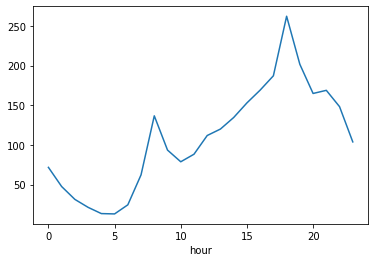

In [25]:
train.groupby('hour').mean()['count'].plot()
#--> 출근등교 시간 + 퇴근하교시간에 그래프가 튄다.

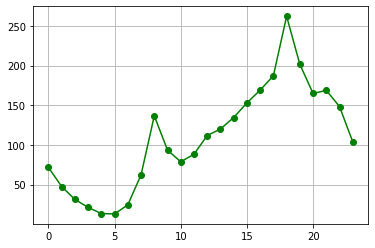

In [26]:
import matplotlib.pyplot as plt

plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()

### plt.plot()의 스타일

색깔

|문자열|약자|
|----|-----|
|blue|b|
|green|g|
|red|r|
|cyan|c|
|magenta|m|
|yellow|y|
|black|k|
|white|w|

마커

|마커|의미|
|----|----|
|.|점|
|o|원|
|v|역삼각형|
|^|삼각형|
|s|사각형|
|*|별|
|x|엑스|
|d|다이아몬드|

선

|문자열|의미|
|-----|-----|
| - | 실선|
|-- | 끊어진 실선|
| -.| 점+실선|
|:|점선|

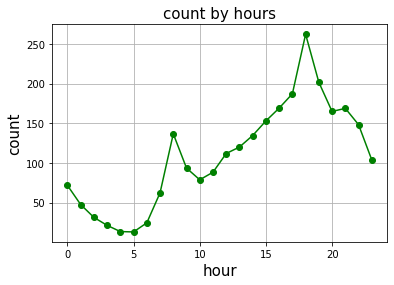

In [27]:
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()

plt.title('count by hours', fontsize=15)
plt.xlabel('hour', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.savefig('image/따릉이_graph.png')

### plt.title(label, fontsize)
- 그래프 제목 생성

### plt.xlabel(label, fontsize)
- x축 이름 설정

### plt.ylabel(label, fontsize)
- y축 이름 설정

### plt.axvline(x, color)
- 축을 가로지르는 세로 선 생성

### plt.text(x, y, s, fontsize)
- 원하는 위치에 텍스트 생성

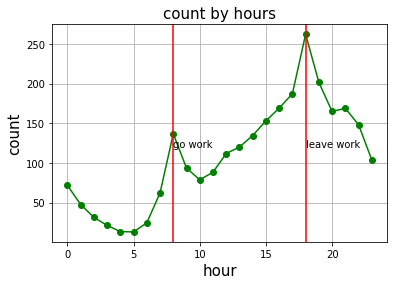

In [28]:
plt.plot(train.groupby('hour').mean()['count'], 'go-')
plt.grid()

plt.title('count by hours', fontsize=15)
plt.xlabel('hour', fontsize=15)
plt.ylabel('count', fontsize=15)

plt.axvline(8, color='r')
plt.axvline(18, color='r')

plt.text(8, 120, 'go work', fontsize=10)
plt.text(18, 120, 'leave work', fontsize=10)

plt.savefig('따릉이_graph.png')

### 상관계수

- 상관계수: 두 개의 변수가 같이 일어나는 강도를 나타내는 수치 
- -1에서 1사이의 값을 지닙니다. 
- -1이나 1인 수치는 현실 세계에서 관측되기 힘든 수치입니다. 
- 분야별로 기준을 정하는 것에 따라 달라지겠지만, 보통 0.4이상이면 두 개의 변수간에 상관성이 있다고 얘기합니다. 

![상관계수](https://t1.daumcdn.net/cfile/tistory/99DEE1425C6A9F2008)

- 상관관계는 인과관계와 다릅니다. 아래의 예시를 확인해 봅시다.

![상관성 예시](https://miro.medium.com/max/684/1*JLYI5eCVEN7ZUWXBIrrapw.png)

- 선글라스 판매량이 증가함에 따라, 아이스크림 판매액도 같이 증가하는 것을 볼 수 있습니다. 
- 하지만 선글라스 판매량이 증가했기 **때문에** 아이스크림 판매액이 증가했다라고 해석하는 것은 타당하지 않습니다. 
- 선글라스 판매량이 증가했다는 것은 여름 때문이라고 볼 수 있으므로, 날씨가 더워짐에 따라 선글라스 판매량과 아이스크림 판매액이 같이 증가했다고 보는 것이 타당할 것입니다. 

### pd.DataFrame.corr()

- correlation coefficient 의 줄임말 입니다 

In [29]:
import seaborn as sns

<AxesSubplot:>

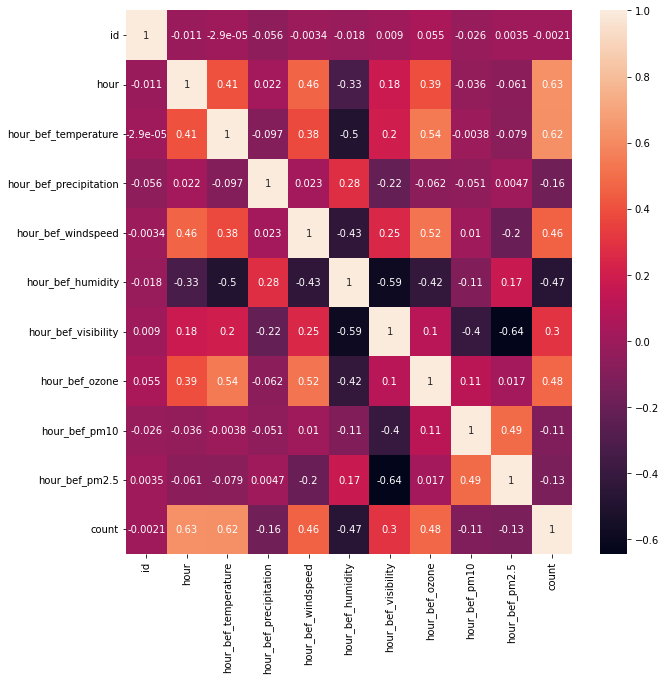

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)

**--> 상관계수가 높은 데이터 3개 지목**
- hour(시간)
- hour_bef_temparature(1시간전 온도)
- hour_bef_windspeed(1시간전 풍속 굵은 텍스트

** 참고영상**
https://www.youtube.com/watch?v=7IbTi1QicHU 

-------------------------------------------

## 3. 데이터 전처리
## Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [31]:
train.head()

# 결측치 확인: hour, hour_bef_temparature,hour_bef_windspeed
train.isna().sum()

# test.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [32]:
#train-1시간전 온도의 결측치 2개 확인
train[train['hour_bef_temperature'].isna()]


# train-1시간전 풍속 결측치 9개 확인
train[train['hour_bef_windspeed'].isna()]
# train[train['hour_bef_windspeed'].isna()].index

# test-1시간전 온도의 결측치확인
test[test['hour_bef_temperature'].isna()]

# test-1시간전 풍속의 결측치확인
test[test['hour_bef_windspeed'].isna()]

id  hour  hour_bef_temperature  hour_bef_precipitation  \
653  1943    19                   NaN                     NaN   

     hour_bef_windspeed  hour_bef_humidity  hour_bef_visibility  \
653                 NaN                NaN                  NaN   

     hour_bef_ozone  hour_bef_pm10  hour_bef_pm2.5  
653             NaN            NaN             NaN

In [33]:
# train-시간별 온도 평균 확인
train.groupby('hour').mean()['hour_bef_temperature']

# train-시간별 풍속 평균 확인
train.groupby('hour').mean()['hour_bef_windspeed']


# test-시간별 온도 평균 확인
# test.groupby('hour').mean()['hour_bef_temperature']

# test-시간별 풍속 평균 확인
test.groupby('hour').mean()['hour_bef_windspeed']

hour
0     1.986667
1     1.840000
2     1.823333
3     1.636667
4     1.543333
5     1.589655
6     1.396667
7     1.453333
8     1.446667
9     1.646667
10    1.920000
11    2.186667
12    2.636667
13    2.836667
14    2.903333
15    3.140000
16    3.406897
17    3.558621
18    3.503448
19    3.541379
20    3.406667
21    3.041379
22    2.686667
23    2.336667
Name: hour_bef_windspeed, dtype: float64

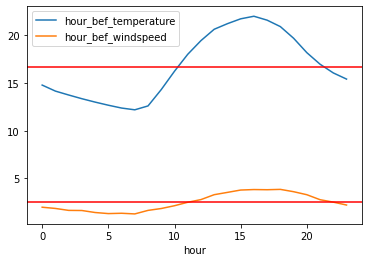

In [34]:
# 시간별 온도 평균 확인-그래프로 확인
train.groupby('hour').mean()['hour_bef_temperature'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean(),c='r')


# 시간별 풍속 평균 확인-그래프로 확인
train.groupby('hour').mean()['hour_bef_windspeed'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_windspeed'].mean(),c='r')

plt.legend()
plt.show()

### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.

In [35]:
# train-1시간전 온도 결측치 평균온도로 지정
train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667},inplace=True)


#  train-1시간전 풍속 결측치 평균풍속으로 지정
train['hour_bef_windspeed'].fillna({18:3.281356, 244:1.836667, 260:1.620000, 376:1.965517, 780:3.278333, 934:1.965517, 1035:3.838333, 1138:2.766667, 1229:1.633333},inplace=True)


# test-1시간전 온도 결측치 평균온도로 지정
test['hour_bef_temperature'].fillna({653:26.110345 },inplace=True)

# test-1시간전 풍속 결측치 평균온도로 지정
test['hour_bef_windspeed'].fillna({653:3.541379 },inplace=True)

In [36]:
# train-1시간전 온도 결측치
train.loc[[934,1035], :]
# train[train['hour_bef_temperature'].isna()]


# train-1시간전 풍속 결측치
train[train['hour_bef_windspeed'].isna()]


# test-1시간전 온도 결측치
test[test['hour_bef_temperature'].isna()]

# test-1시간전 풍속 결측치
test[test['hour_bef_windspeed'].isna()]

Empty DataFrame
Columns: [id, hour, hour_bef_temperature, hour_bef_precipitation, hour_bef_windspeed, hour_bef_humidity, hour_bef_visibility, hour_bef_ozone, hour_bef_pm10, hour_bef_pm2.5]
Index: []

** 참고영상**
https://www.youtube.com/watch?v=FrzmkRKDyjA 

------------------------------------

## 4. 변수 선택 및 모델 구축
## Feature Engineering & Initial Modeling  

In [37]:
# train.columns

features = ['hour', 'hour_bef_temperature', 'hour_bef_windspeed'] 

X_train = train[features]
y_train = train['count']
X_test = test[features]

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(1459, 3)
(1459,)
(715, 3)


### sklearn.ensemble.RandomForestRegressor()
- **랜덤 포레스트 모형**: 분류, 회귀 분석 등에 사용되는 앙상블 학습 방법의 일종으로, 훈련 과정에서 구성한 다수의 결정 트리로부터 분류 또는 평균 예측치(회귀 분석)를 출력함으로써 동작하는 방식

In [39]:
# hyper parameter 설정하기
model_100 = RandomForestRegressor(n_estimators=100, random_state=0)
model_100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model_200 = RandomForestRegressor(n_estimators=200)

# ctrl+shift : 파라미터 창 보기

## 5. 모델 학습 및 검증
## Model Tuning & Evaluation

### model.fit()
- 모델 학습

In [40]:
model_100.fit(X_train, y_train)
model_100_5.fit(X_train, y_train)
model_200.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200)

### model.predict()
- 모델 예측

In [41]:
ypred1 = model_100.predict(X_test)
ypred2 = model_100_5.predict(X_test)
ypred3 = model_200.predict(X_test)

In [42]:
ypred1

array([ 86.615     , 245.59      , 106.4       ,  32.74      ,
       133.01666667, 126.05      , 237.87      , 371.12      ,
        45.45      , 184.57      , 296.28      , 245.09      ,
       136.33      ,  45.9       , 198.53      , 124.28      ,
        29.25      , 212.23      , 393.32      , 139.01      ,
       174.28      , 100.85      ,  17.83      , 123.91      ,
       156.29      , 102.545     ,  25.14      ,  86.42      ,
       124.23      , 192.06      ,  99.26      ,  32.69      ,
        66.65      , 141.82      , 252.51      ,  39.15      ,
       169.79      , 153.94      , 262.99      ,  96.91      ,
        57.72      , 110.84      , 159.22      ,  51.99      ,
       324.52      , 206.932     , 101.58      ,  59.85      ,
        15.39      ,  93.26      , 200.15      ,  96.99      ,
       197.27      , 148.4       , 161.56      , 135.96      ,
        44.44      , 155.93      ,  18.58      ,  16.97      ,
       103.4       ,  88.97      , 276.82      , 307.38

### pd.DataFrame.to_csv()
 - csv파일 저장하는 함수

In [43]:
submission['count'] = ypred1
submission.to_csv('data/따릉이/out_model_100.csv', index=False)

In [44]:
submission['count'] = ypred2
submission.to_csv('data/따릉이/out_model_100_5.csv', index=False)

In [45]:
submission['count'] = ypred3
submission.to_csv('data/따릉이/out_model_200.csv', index=False)

## 6. 결과 및 결언
## Conclusion & Discussion